# Plots of the trajectories of mergers

In this section, we try to see the trajectories of the three BHs when a **merge event** happened.

First of all, as indicated on the 1st notebook (*1-Preprocessing_data.ipynb*), when a binary merged, an output file called "*Merge.dat*" on the simulation's directory(one of **TBS\_n** , *n=0,...,1000*) is produced.  <br>
This file contains a lot of informations about the mergers but we are interested mainly on those values that indicate which BH merges; in fact, for example, if the mergers are *BH1* and *BH3*, we implicitly know that before the merge event occured, an **exchange 2 - 3** event happened ( remember that at the beginning of every simulation, the binary is composed by *BH1* and *BH2*.)


In [98]:
#importing libraries
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# importing the dataframe with the last point of simulation, for both NSC and YSC
def fileinput_from_file (input_directory_file):
    
    input_directory_file = "Data/" + input_directory_file +".dat"

    df = pd.read_csv( input_directory_file , sep=",", header=0)
    print("OK! Uploaded file:",input_directory_file)
    return(df)  

### Upload the dataframe of NSC and YSC from the files previously generated

In [99]:
data_phy_NSC = fileinput_from_file("NSC_N10000_ok_phy") 
data_nb_NSC = fileinput_from_file("NSC_N10000_ok_nb") 
data_phy_YSC = fileinput_from_file("YSC_N10000_ok_phy") 
data_nb_YSC = fileinput_from_file("YSC_N10000_ok_nb") 

OK! Uploaded file: Data/NSC_N10000_ok_phy.dat
OK! Uploaded file: Data/NSC_N10000_ok_nb.dat
OK! Uploaded file: Data/YSC_N10000_ok_phy.dat
OK! Uploaded file: Data/YSC_N10000_ok_nb.dat


In [100]:
# An examples of NSC dataframe already imported
print("\n\t\t\tNUCLEAR STAR CLUSTER - DATASET \n")
data_phy_NSC[data_phy_NSC.event == "merge"].head()


			NUCLEAR STAR CLUSTER - DATASET 



m             x             y             z            vx  \
3483  9.785056e+31  2.452733e+16  6.729434e+16 -1.168997e+16   8313.260482   
3484  2.181282e+31 -1.100277e+17 -3.018771e+17  5.244029e+16 -37292.625791   
3485  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
4347  1.376237e+32 -2.462175e+16  3.417534e+15  1.431820e+16 -12398.936922   
4348  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   

                 vy            vz            Eb  simulation  event  
3483   23745.785601  -3643.777589 -1.734532e+41        1161  merge  
3484 -106521.706886  16345.696659 -0.000000e+00        1161  merge  
3485       0.000000      0.000000 -0.000000e+00        1161  merge  
4347    1076.400959   6289.572938 -0.000000e+00        1449  merge  
4348       0.000000      0.000000 -0.000000e+00        1449  merge

### Simple function to count each type of the events

Here below a simple function that return how many events belong to each type of events.

In [101]:
def count_events (dataframe):
    
    '''
    INPUT:
        dataframe: YSC or NSC dataframe with the type of event for each simulation
        
    OUTPUT: 
            df: A small dataframe is returned, containing the counts for each type of event
    '''
    counts = np.array( [len(dataframe[dataframe.event == 'flyby']),
                        len(dataframe[dataframe.event == 'change13']),
                        len(dataframe[dataframe.event == 'change23']),
                        len(dataframe[dataframe.event == 'ionization']),
                        len(dataframe[dataframe.event == 'merge']),
                        len(dataframe[dataframe.event == 'Not_found']) ] )
    df=pd.DataFrame(counts/3, columns=["counts"], index = ["flyby","change13","change23","ionization","merge","Not_found"] ).T
    return(df)



N=10000

NSC_events_phy = count_events(data_phy_NSC)

NSC_events_nb = count_events(data_nb_NSC)

YSC_events_phy = count_events(data_phy_YSC)

YSC_events_nb = count_events(data_nb_YSC)

In [102]:
#An example of the number of events that happened on this NSC dataset
print("\n\t\tNUCLEAR STAR CLUSTER (NSC)")
NSC_events_phy


		NUCLEAR STAR CLUSTER (NSC)


flyby  change13  change23  ionization  merge  Not_found
counts  7928.0     313.0     727.0      1009.0   22.0        1.0

In [103]:
#An example of the number of events that happened on this YSC dataset
print("\n\t\tYOUNG STAR CLUSTER (YSC)")
YSC_events_phy


		YOUNG STAR CLUSTER (YSC)


flyby  change13  change23  ionization  merge  Not_found
counts  7617.0     443.0    1678.0        63.0   11.0      188.0

## Retrieving MERGE Events

From here, we start to investigate the **Mergers** and we filtered the dataframe to only this peculiar type of event.

Also, we store the simulation number of these events, so that it could be used later to perform the plot of the trajectory.

In [104]:
merge_N_df = data_nb_NSC[data_nb_NSC.event == 'merge']
merge_Y_df = data_nb_YSC[data_nb_YSC.event == 'merge']

merge_N_sim_num = np.unique(np.array(merge_N_df.simulation.values))
merge_Y_sim_num = np.unique(np.array(merge_Y_df.simulation.values))

print("Simulation number of merging event for NSC:\n", merge_N_sim_num, "\nTot event:", np.count_nonzero(merge_N_sim_num))
print("\n\nSimulation number of merging event for YSC:\n", merge_Y_sim_num, "\nTot event:", np.count_nonzero(merge_Y_sim_num))

Simulation number of merging event for NSC:
 [1161 1449 1878 2048 2252 2623 3037 3077 3212 3446 4297 5435 5480 5727
 6064 6389 6820 7198 8692 8764 9427 9492] 
Tot event: 22


Simulation number of merging event for YSC:
 [1758 2416 4789 5111 7412 7911 8430 8856 9208 9768 9926] 
Tot event: 11


## Function to plot trajectories 3D of Mergers

Here below it has been defined an unique function that plot the trajectory of mergers from the beginning (or a specific point) of the simulation until to the merge event.

It's also possible to plot the initial binary BHs (always fixed BH1 and BH2) instead of the three BHs together, in order to see its evolution.


In [190]:
def plot_simulation(type_cluster, num_sim, title="", lim_inf=0, lim_sup=0, plot_binary=False, plot_all_bhs=True, point_after_merging= 1000, scale_merger=False):
    
    '''
    INPUT:
        type_cluster: ["string"] --> string of the cluster from which upload the data, YSC or NSC
        
        num_sim: [int] --> the simulation number to be passed for plotting ( will be passed only simulation of mergers)
        
        title: [string] --> A specific string will be displayed below a fixed title for each plot (default="")
        
        lim_inf: [int] --> index from which start to plot (default = 0 ---> from the beginning)
        
        plot_binary : [True/False] --> decide if there will be a 3D  trajectory plot of initial binaries (default=False)
        
        plot_all_bhs: [True/False] --> decide if there will be a 3D trajectory plot of all the BHs (default=False)
        
        point_after_merging: [int] --> timestep/index of how many points other points will be plot after the merge 
                                        event happend (default=1000 --> all the simulation)
                                        
        scale_merger: [True/False] --> decide to restrict axes plot to only the trajectory of the merger (default= False)
        
    OUTPUT:
            plots of binaries / plot of 3 BHs / plot of both
    '''

    names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz']
    
    idx_merge=0
    test = 0

    pos1 = np.zeros((1001, 3))
    pos2 = np.zeros((1001, 3))
    pos3 = np.zeros((1001, 3))    

    # --------- import the trajectories coordnates from dataframe ---------
    for i in range(1001):

        n = str(1000000 + i)
        df = pd.read_csv( str(type_cluster)+'_t100/TBS_'+ str(num_sim) +'/'+ n +'.dat', sep="\s+", header=None, names=names, float_precision='round_trip')
        for j, coord in enumerate(['x', 'y', 'z']):
            pos1[i][j] = df[coord][0]
            pos2[i][j] = df[coord][1]
            pos3[i][j] = df[coord][2]
            
        # --------- read which BH has merged ---------
        merger_tmp = pd.read_csv( str(type_cluster)+'_t100/TBS_'+ str(num_sim) +'/Merge.dat', sep="\s+", header=None)
        mergers= (merger_tmp.T[1:3].T.values).tolist()
        mergers = [mergers[0][0], mergers[0][1]]
        
        if test == 0:
            if (np.all(pos1[i] == 0) ==True) or (np.all(pos2[i] == 0)==True) or (np.all(pos3[i] == 0) == True) :
                idx_merge = i # index at which the merge event happend
                test=1
    
    #---- set the upper limit for plot as "point_after_merging" value after the index of the merge happend
    if lim_sup==0:
        lim_sup = idx_merge + point_after_merging
        if lim_sup > 1000: lim_sup=1000 # set the upper maximum bound of index as the length of database

        
    pos1 = pos1[0:lim_sup,:]
    pos2 = pos2[0:lim_sup,:]
    pos3 = pos3[0:lim_sup,:]

    # ------ Converting from N-body units to physical units ---------      
    
    L_scale = 3.08567758130573e16    # in m (1 pc --> 3.08567758130573 * 10^16 m)

    x1 = pos1[:, 0] #* L_scale
    y1 = pos1[:, 1] #* L_scale
    z1 = pos1[:, 2] #* L_scale

    x2 = pos2[:, 0] #* L_scale
    y2 = pos2[:, 1] #* L_scale
    z2 = pos2[:, 2] #* L_scale

    x3 = pos3[:, 0] #* L_scale
    y3 = pos3[:, 1] #* L_scale
    z3 = pos3[:, 2] #* L_scale


    
    #-----------------------------  PLOT 3D - binary -------------------------
    if plot_binary == True :
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection='3d')
        
        #--- plot of binary BHs from begin until the merge event happend (straight lines)
        ax.plot3D(x1[lim_inf : lim_sup], y1[lim_inf : lim_sup], z1[lim_inf : lim_sup], c='red', label='BH1')
        ax.plot3D(x2[lim_inf : lim_sup], y2[lim_inf : lim_sup], z2[lim_inf : lim_sup], c='blue', label='BH2')
        
        #--- scatter of binary BHs position when the merge event happend (circular marker)
        ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='red',  s=100)
        ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='blue', s=100)

        plt.legend(loc='best')
        plt.title("Binary BHs")

        if scale_merger==True:
            x_mat = np.array([x1,x2])
            y_mat = np.array([y1,y2])
            z_mat = np.array([z1,z2])

            #--- set the limits of the plot ------
            ax.set_xlim3d(np.amin(x_mat),np.amax(x_mat) )
            ax.set_ylim3d(np.amin(y_mat),np.amax(y_mat) )
            ax.set_zlim3d(np.amin(z_mat),np.amax(z_mat) )
    
    
#-------------------------- PLOT 3D - 3 bodies-----------------------------------------------------------
    
    if plot_all_bhs == True:    # given as input of the function to decide to plot all 3 Bhs trajectories
        
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection='3d')
        ax.set_xlabel('\nX  [pc]', fontsize=12 ) # , rotation=150)
        ax.set_ylabel('\nY  [pc]', fontsize=12 ) # , rotation=150)
        ax.set_zlabel('\nZ  [pc]', fontsize=12 ) # , rotation=150)
        
        #--- discriminate which BHs merge ( case 1: BH1 & BH2 )
        #                                 ( case 2: BH1 & BH3 )
        #                                 ( case 3: BH2 & BH3 )

        
        # ----- CASE 1 ----------
        if mergers==[1,2]:  
            #plot the starting point for each of 3 BHs (TRIANGULAR MARKER)
            ax.plot3D(x1[0], y1[0], z1[0],marker='^',markersize=15,fillstyle='none', c='red', label = "Initial point BH1")
            ax.plot3D(x2[0], y2[0], z2[0],marker='^',markersize=15,fillstyle='none', c='blue', label = "Initial point BH2")
            ax.plot3D(x3[0], y3[0], z3[0],marker='^' ,markersize=15,fillstyle='none', c='green' , label = "Initial point BH3")


            # plot until the merge appended, plot all 3 BHs ( STRAIGHT LINE)
            ax.plot3D(x1[lim_inf : idx_merge+1], y1[lim_inf : idx_merge+1], z1[lim_inf : idx_merge+1],lw=3, c='red', label='BH1 before merge event')
            ax.plot3D(x2[lim_inf : idx_merge+1], y2[lim_inf : idx_merge+1], z2[lim_inf : idx_merge+1], alpha=0.7, c='blue', label='BH2 before merge event')
            ax.plot3D(x3[lim_inf : idx_merge+1], y3[lim_inf : idx_merge+1], z3[lim_inf : idx_merge+1], alpha=0.7, c='green', label='BH3 before merge event')

            #  scatter plot AT THE MERGING POINT ( STELLAR MARKER) and the position of the other BH (SMALL DOT MARKER)
            ax.plot3D(x1[idx_merge], y1[idx_merge], z1[idx_merge], marker="*", markersize=12,markeredgewidth = 2, c='black', label = "Merging point (BH1 & BH2)")
            ### ax.plot3D(x3[idx_merge], y3[idx_merge], z3[idx_merge],marker=".", markersize=10, c='green')

            # continue plot after merge event only for the remaining BHs ( in this case: BH12_merg & BH3) (DASHED LINE)
            ax.plot3D(x1[idx_merge : lim_sup], y1[idx_merge : lim_sup], z1[idx_merge : lim_sup], ls="--", c='black', label='(BH1 + BH2) after merged')
            ax.plot3D(x3[idx_merge : lim_sup], y3[idx_merge : lim_sup], z3[idx_merge : lim_sup], ls ="--",alpha=0.5, c='green', label= "BH3 after merge event")

            
            #  scatter plot at the final position ( selected by "point_after_merging") of the other BH (BIG CIRCULAR MARKER)            
            ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='black'  , s=100, label = "(BH1 + BH2) final point")
            ax.scatter3D(x3[lim_sup-1], y3[lim_sup-1], z3[lim_sup-1], c='green', s=100, label = "BH3 final point")
            plt.legend(loc='best')
            
            #--- set the limits of the plot ------
            if scale_merger==True:
                x_mat = np.array([x1,x2])
                y_mat = np.array([y1,y2])
                z_mat = np.array([z1,z2])
                ax.set_xlim3d(np.amin(1.5 * x_mat),np.amax(1.5 * x_mat) )
                ax.set_ylim3d(np.amin(1.5 * y_mat),np.amax(1.5 * y_mat) )
                ax.set_zlim3d(np.amin(1.5 * z_mat),np.amax(1.5 * z_mat) )

            
            ax.set_title("{}: 3-bodies dynamic: Mergers BH1 & BH2 - FLYBY\n{}".format(type_cluster, str(title)))
    
        # ----- CASE 2 ----------
        if mergers==[1,3]: 
            
            #plot the starting point for each of 3 BHs (TRIANGULAR MARKER)
            ax.plot3D(x1[0], y1[0], z1[0],marker='^',markersize=15,fillstyle='none', c='red' , label = "Initial point BH1")
            ax.plot3D(x2[0], y2[0], z2[0],marker='^',markersize=15,fillstyle='none', c='blue', label = "Initial point BH2")
            ax.plot3D(x3[0], y3[0], z3[0],marker='^' ,markersize=15,fillstyle='none', c='green' , label = "Initial point BH3")

            # plot until the merge appended, plot all 3 BHs ( STRAIGHT LINE)
            ax.plot3D(x1[lim_inf : idx_merge+1], y1[lim_inf : idx_merge+1], z1[lim_inf : idx_merge+1], lw=3, c='red', label='BH1 before merge event')
            ax.plot3D(x2[lim_inf : idx_merge+1], y2[lim_inf : idx_merge+1], z2[lim_inf : idx_merge+1],alpha=0.7, c='blue', label='BH2 before merge event')
            ax.plot3D(x3[lim_inf : idx_merge+1], y3[lim_inf : idx_merge+1], z3[lim_inf : idx_merge+1],alpha=0.7, c='green', label='BH3 before merge event')

            #  scatter plot AT THE MERGING POINT ( STELLAR MARKER) and the position of the other BH (SMALL DOT MARKER)
            ax.plot3D(x1[idx_merge], y1[idx_merge], z1[idx_merge], marker="*", markersize=12, c='orange', label = "Merging point (BH1 & BH3)")
            ### ax.plot3D(x2[idx_merge], y2[idx_merge], z2[idx_merge],marker=".", markersize=10, c='blue')

            # continue plot after merge event only for the remaining BHs ( in this case: BH13_merg & BH2) (DASHED LINE)
            ax.plot3D(x1[idx_merge : lim_sup], y1[idx_merge : lim_sup], z1[idx_merge : lim_sup],ls="--", c='orange', label='(BH1 + BH3) after merged')
            ax.plot3D(x2[idx_merge : lim_sup], y2[idx_merge : lim_sup], z2[idx_merge : lim_sup], ls ="--",alpha=0.5, c='blue', label= "BH2 after merge event")

            #  scatter plot at the final position ( selected by "point_after_merging") of the other BH (BIG CIRCULAR MARKER)
            ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='orange'  , s=100, label = "(BH1 + BH3) final point")
            ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='blue'    , s=100, label = "BH2 final point")
            #ax.scatter3D(x3[lim_sup-1], y3[lim_sup-1], z3[lim_sup-1], c='green', s=100)
            plt.legend(loc='best')

            #--- set the limits of the plot ------
            if scale_merger==True:
                x_mat = np.array([x1,x3])
                y_mat = np.array([y1,y3])
                z_mat = np.array([z1,z3])
                ax.set_xlim3d(np.amin(1.5 * x_mat),np.amax(1.5 * x_mat) )
                ax.set_ylim3d(np.amin(1.5 * y_mat),np.amax(1.5 * y_mat) )
                ax.set_zlim3d(np.amin(1.5 * z_mat),np.amax(1.5 * z_mat) )
            
            ax.set_title("{}: 3-bodies dynamic: Mergers BH1 & BH3 - EXCHANGE 2-3\n{}".format(type_cluster, str(title)))
        
        # ----- CASE 3 ----------
        if mergers==[2,3]: 
            
            #plot the starting point for each of 3 BHs (TRIANGULAR MARKER)
            ax.plot3D(x1[0], y1[0], z1[0],marker='^',markersize=10,fillstyle='none', c='red',label="Initial point BH1")
            ax.plot3D(x2[0], y2[0], z2[0],marker='^',markersize=10,fillstyle='none', c='blue',label="Initial point BH2")
            ax.plot3D(x3[0], y3[0], z3[0],marker='^' ,markersize=10,fillstyle='none', c='green',label="Initial point BH3")

            # plot until the merge appended, plot all 3 BHs ( STRAIGHT LINE)
            ax.plot3D(x1[lim_inf : idx_merge+1], y1[lim_inf : idx_merge+1], z1[lim_inf : idx_merge+1], c='red', label='BH1 before merge event')
            ax.plot3D(x2[lim_inf : idx_merge+1], y2[lim_inf : idx_merge+1], z2[lim_inf : idx_merge+1], c='blue', label='BH2 before merge event')
            ax.plot3D(x3[lim_inf : idx_merge+1], y3[lim_inf : idx_merge+1], z3[lim_inf : idx_merge+1],lw=3,alpha=0.5, c='green', label='BH3 before merge event')

            #  scatter plot AT THE MERGING POINT ( STELLAR MARKER) and the position of the other BH (SMALL DOT MARKER)
            ### ax.plot3D(x1[idx_merge], y1[idx_merge], z1[idx_merge], marker=".", markersize=10, c='red')
            ax.plot3D(x2[idx_merge], y2[idx_merge], z2[idx_merge], marker="*", markersize=12, c='violet', label = "Merging point (BH2 & BH3)")

            # continue plot after merge event only for the remaining BHs ( in this case: BH1 & BH23_merg) (DASHED LINE)
            ax.plot3D(x1[idx_merge : lim_sup], y1[idx_merge : lim_sup], z1[idx_merge : lim_sup], ls ="--",alpha=0.5, c='red', label='BH1 after merged')
            ax.plot3D(x2[idx_merge : lim_sup], y2[idx_merge : lim_sup], z2[idx_merge : lim_sup], ls="--", c='violet', label='(BH2 + BH3) after merge event')

            #  scatter plot at the final position ( selected by "point_after_merging") of the other BH (BIG CIRCULAR MARKER)
            ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='red'  , s=100, label = "BH1 final point")
            ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='violet' , s=100, label = "(BH2 + BH3) final point")
            #ax.scatter3D(x3[lim_sup-1], y3[lim_sup-1], z3[lim_sup-1], c='green', s=100)
            plt.legend(loc='best')

            #--- set the limits of the plot ------
            if scale_merger==True:
                x_mat = np.array([x3,x2])
                y_mat = np.array([y3,y2])
                z_mat = np.array([z3,z2])
                ax.set_xlim3d(np.amin(1.5 * x_mat),np.amax(1.5 * x_mat) )
                ax.set_ylim3d(np.amin(1.5 * y_mat),np.amax(1.5 * y_mat) )
                ax.set_zlim3d(np.amin(1.5 * z_mat),np.amax(1.5 * z_mat) )
           
            ax.set_title(" {}: 3-bodies dynamic: Mergers BH2 & BH3 - EXCHANGE 1-3\n{}".format(type_cluster,str(title)))
            
        return fig

**NOTE:** 
The coordinates imported from the simulation dataset for both YSC and NSC used for plotting the BHs, are expressed as the location of each BH at each time step respect to the position of center of mass of the initial binary (BH1 & BH2)


<br>
<br>

**LEGEND for PLOTs:**

In order to have a clear comprehension of the following plots, I'll summarize the marker and the line's type here below:
<br>
<br>

$ \triangle \,  \text{ marker:} \rightarrow  \text{indicates the starting position of a specific BH of the simulation}$

$ \overline{\,\,\,\,\,\,\,\,} \,\, \text{ line:} \rightarrow  \text{ trajectory until the merge event happened for each of the three BHs}$

$ \bigstar \, \, \text{ marker:} \rightarrow  \text{indicates the coordinates in which the binary merged}$

[//]: # (  $ \bullet \, \, \text{ marker:} \rightarrow  \text{indicates the coordinates of the 3rd BH when the merge event happened}$   )

$ \overline{\,\,} \, \overline{\,\,}\, \overline{\,\,} \,\, \text{ line:} \rightarrow  \text{trajectory from the time in which the binary merge until the end of simulation (or a specified value of the input parameter's function)}$

$ \bigcirc \, \, \text{ marker:} \rightarrow  \text{indicates the last position of the merged BH and of the 3rd BH}$

<br>
<br>

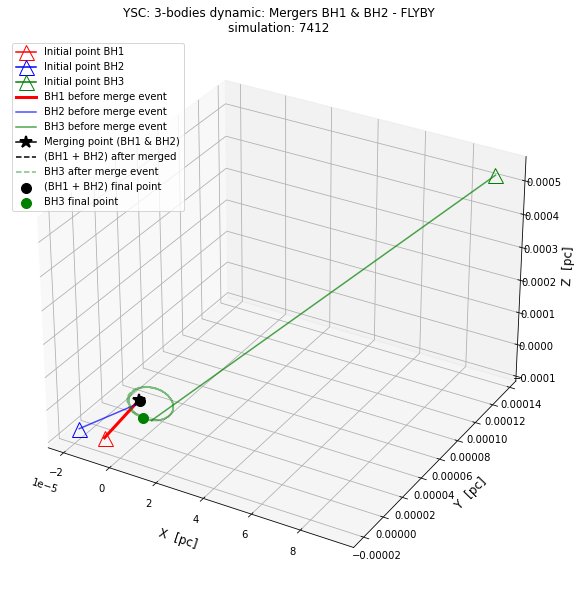

In [191]:
# Example of the 1 simulation of YSC categorized as MERGE
title= "simulation: " + str(merge_Y_sim_num[4])
b = plot_simulation("YSC", num_sim=merge_Y_sim_num[4],lim_sup=0,title=title, plot_binary= False,
                    plot_all_bhs=True, point_after_merging=50, scale_merger=False 
                    )

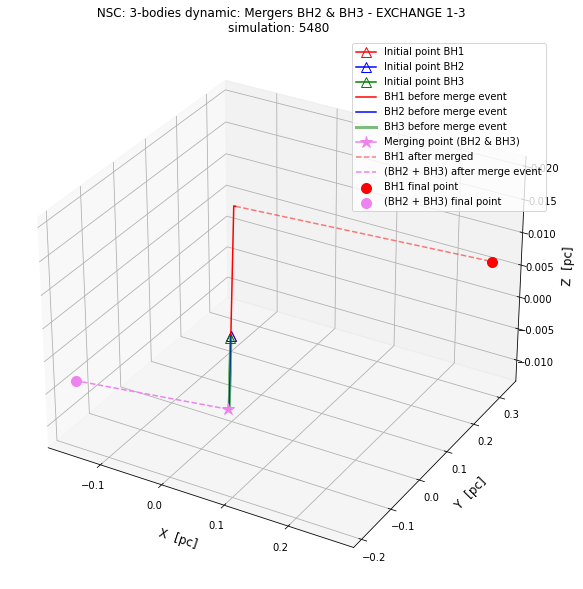

In [194]:
# Example of the 1 simulation of NSC categorized as MERGE
title= "simulation: " + str(merge_N_sim_num[12])
a = plot_simulation("NSC", num_sim=merge_N_sim_num[12],lim_sup=0,title=title, plot_binary= False,
                    plot_all_bhs=True, point_after_merging=50, scale_merger=False)

In [192]:
#a.savefig("/Users/macos-studio/Desktop/ex13merger_traj2.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
#b.savefig("/Users/macos-studio/Desktop/fly_resonant_long.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

<ipython-input-76-79611e1e7618>:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


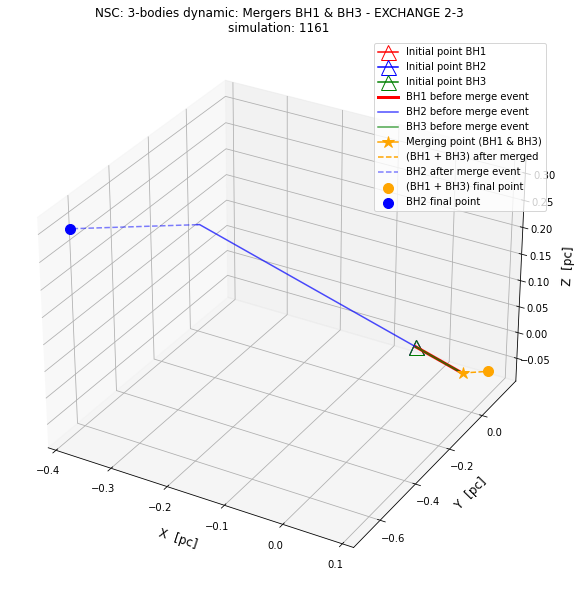

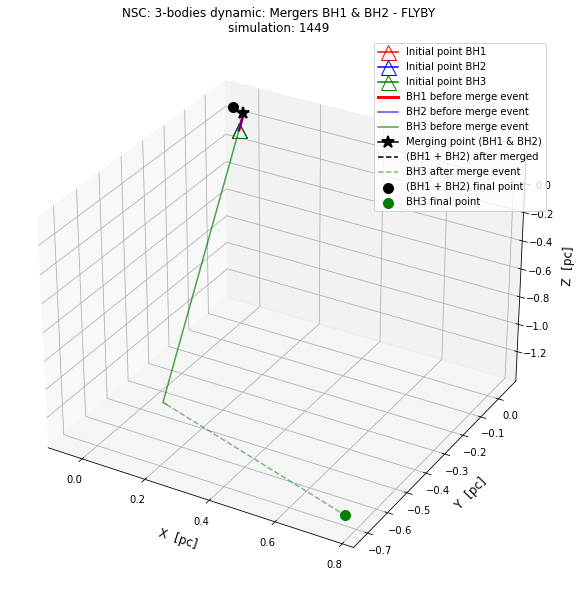

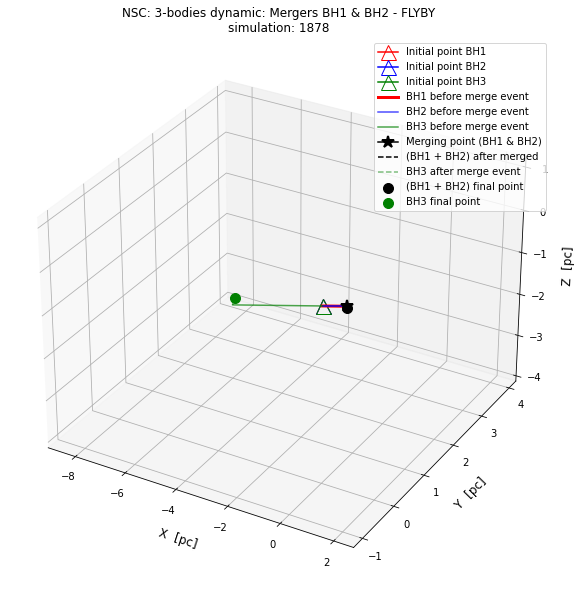

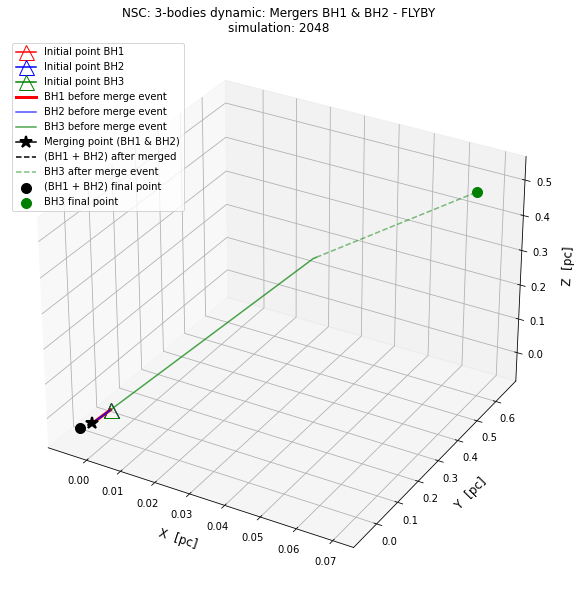

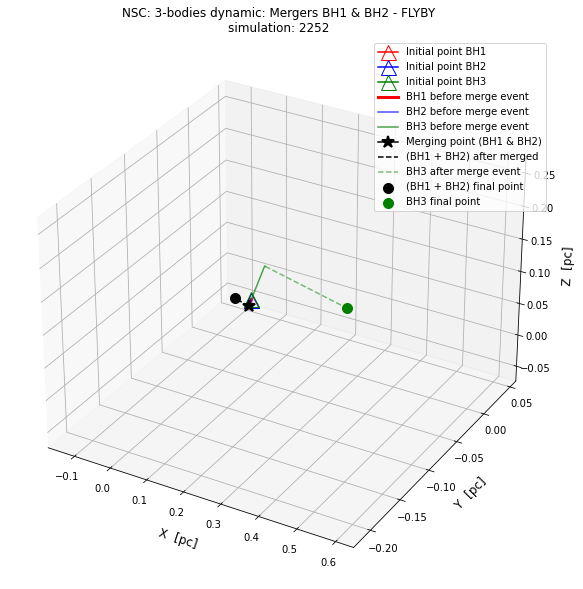

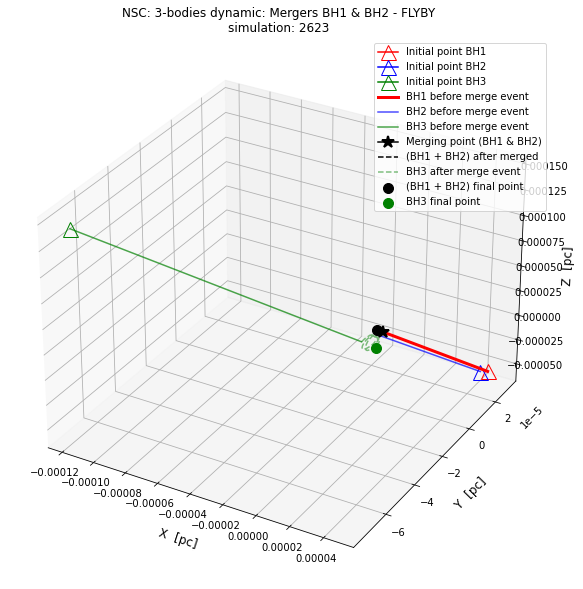

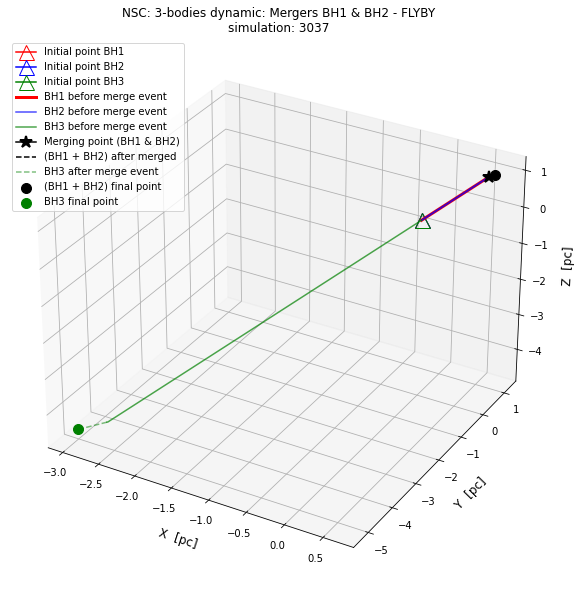

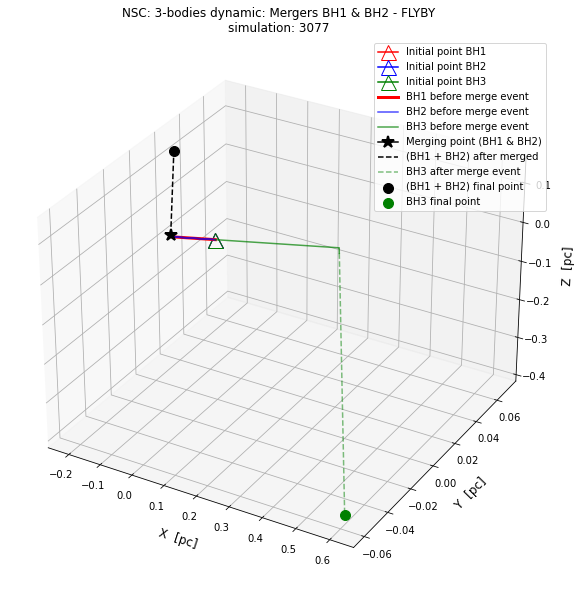

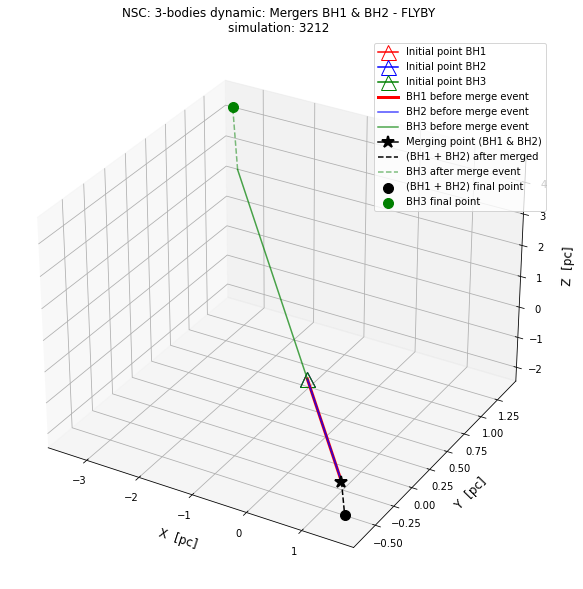

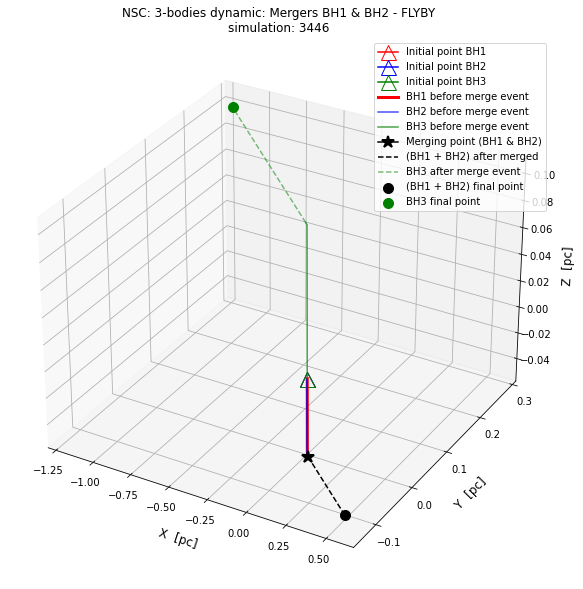

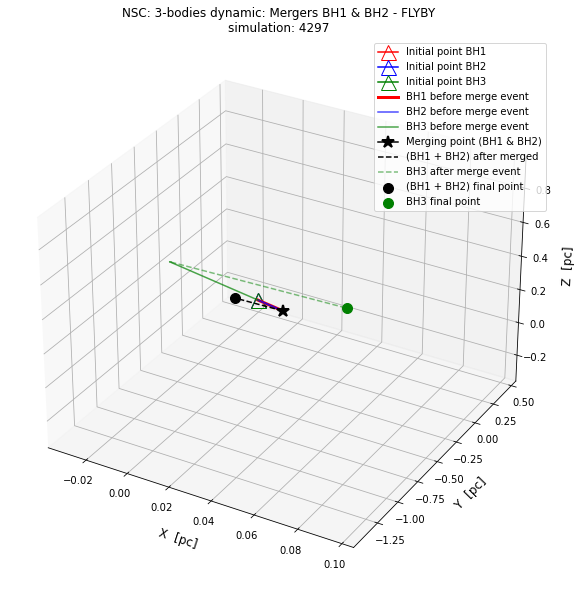

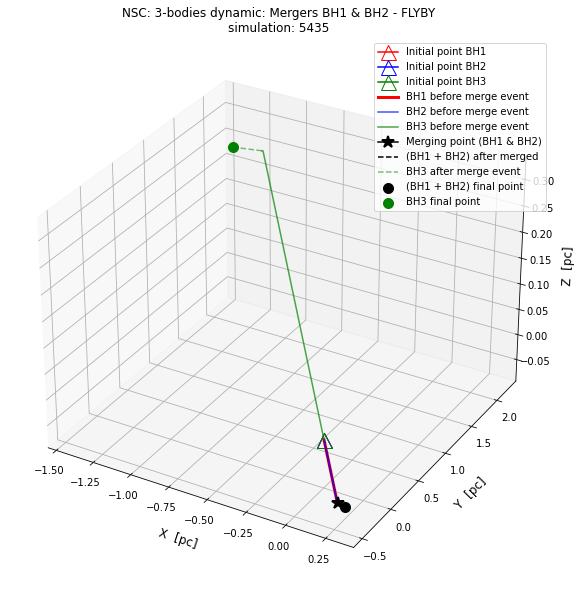

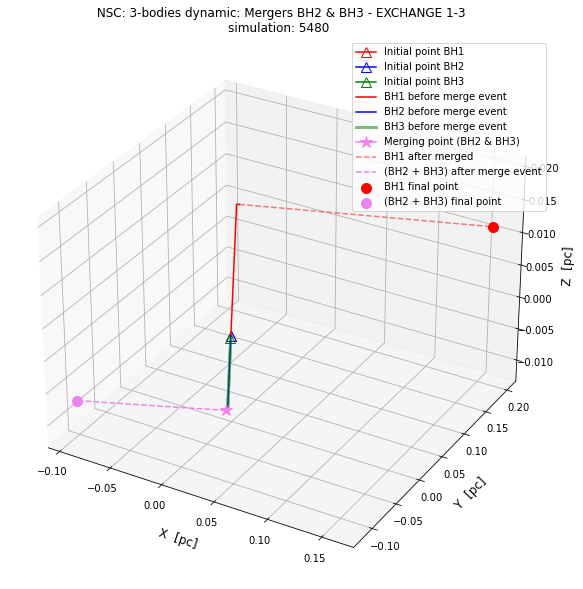

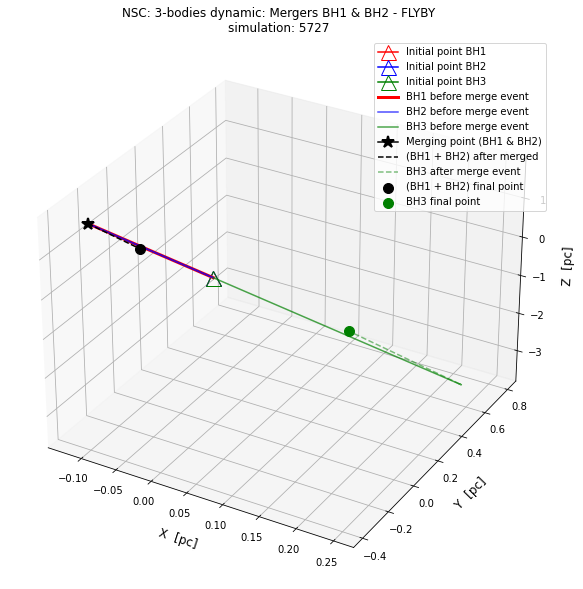

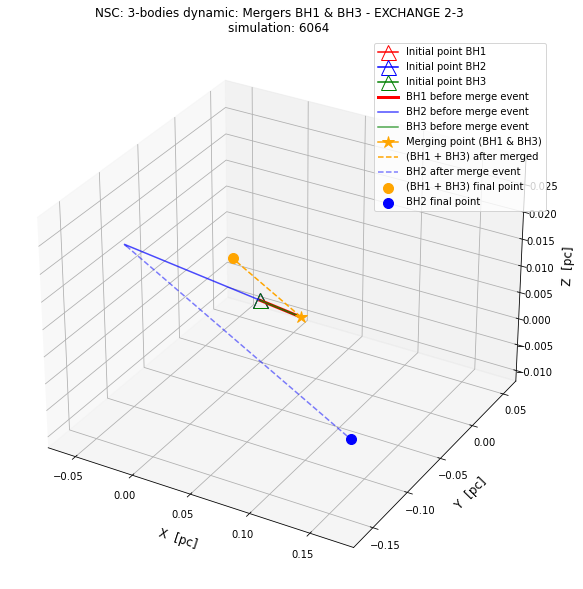

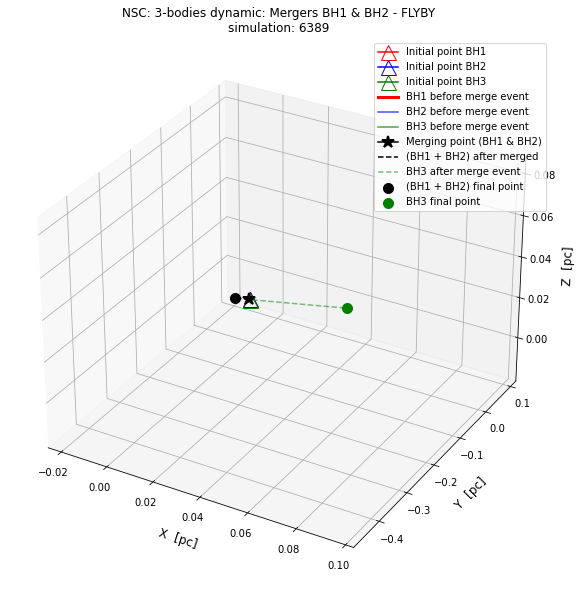

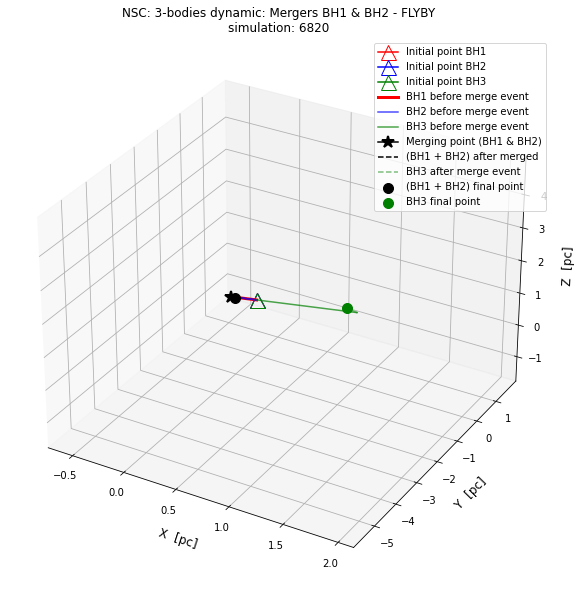

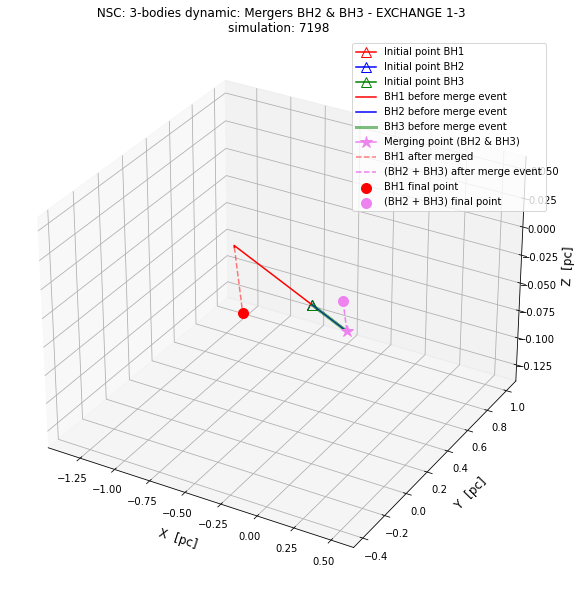

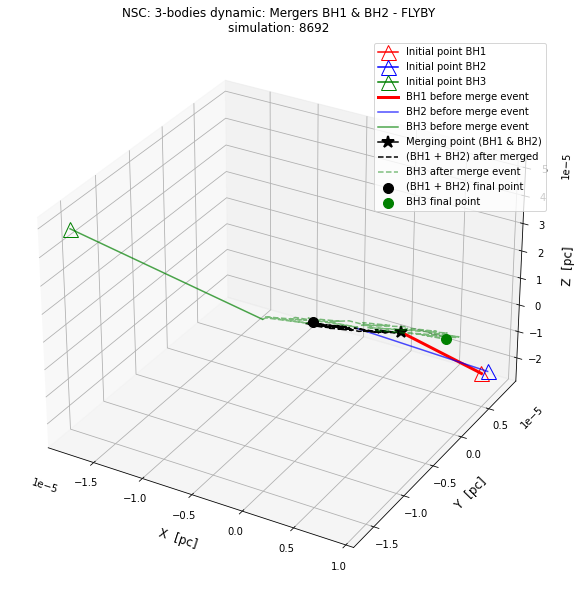

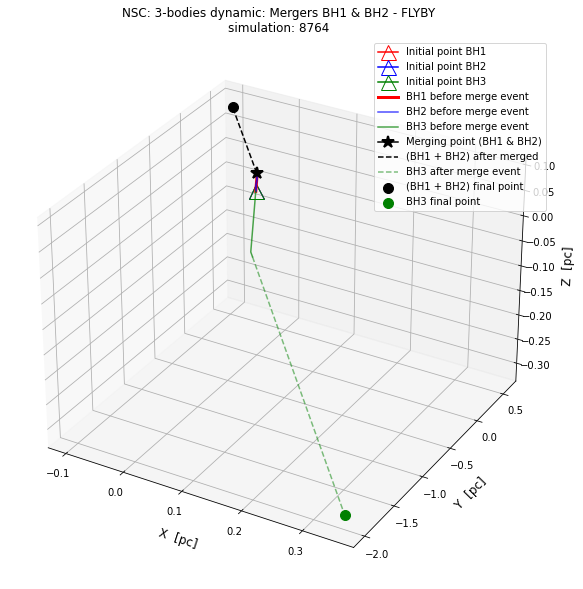

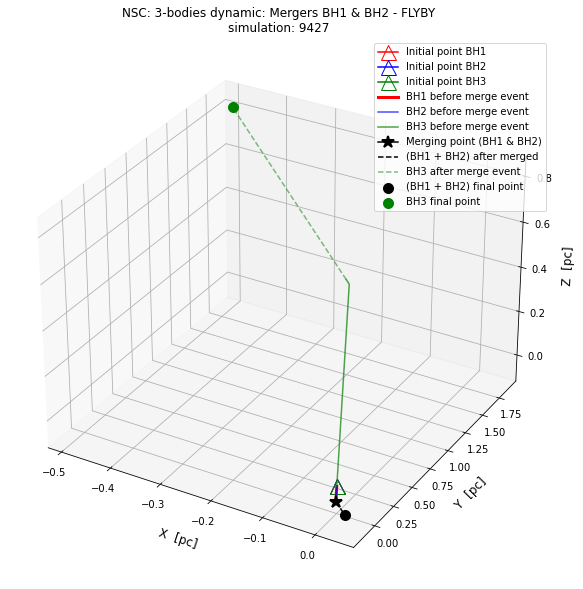

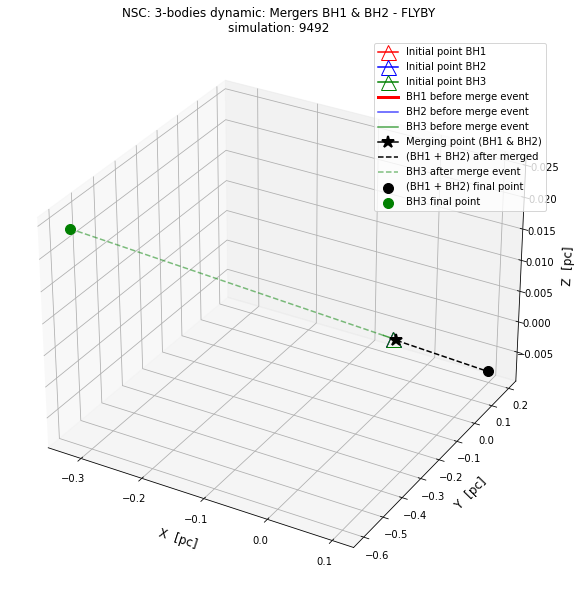

In [97]:
#Plots for NSC
for i in range(len(merge_N_sim_num)): 
    #print("simulation {} of {}".format(i,len(merge_N_sim_num) ))
    title= "simulation: " + str(merge_N_sim_num[i])
    plot_simulation("NSC", num_sim=merge_N_sim_num[i],title= title, plot_binary=False, point_after_merging=30, scale_merger=False)

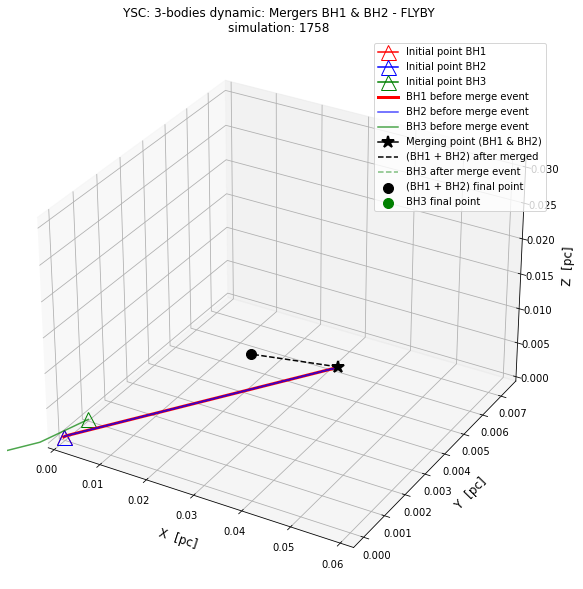

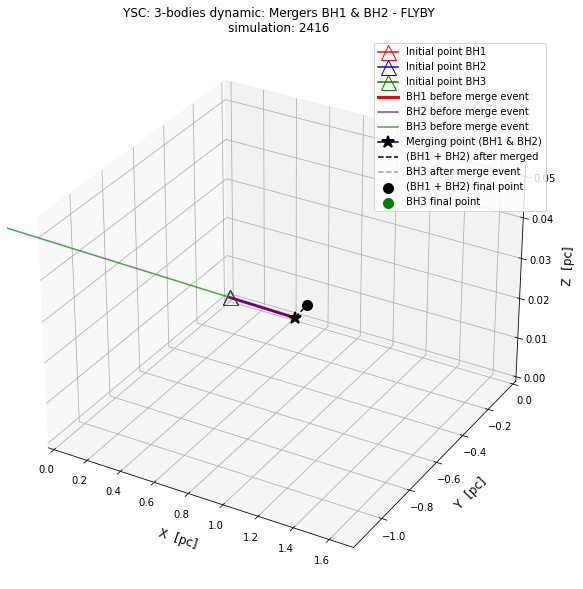

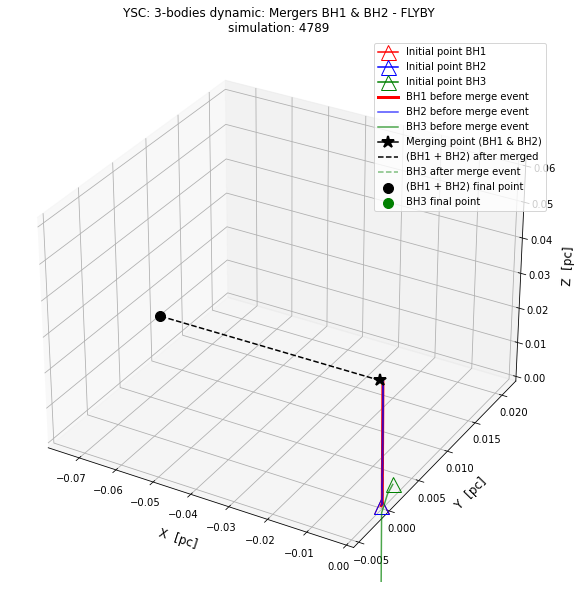

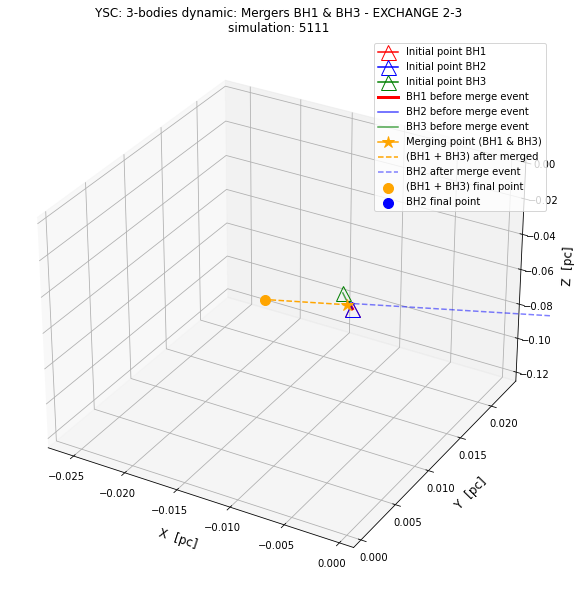

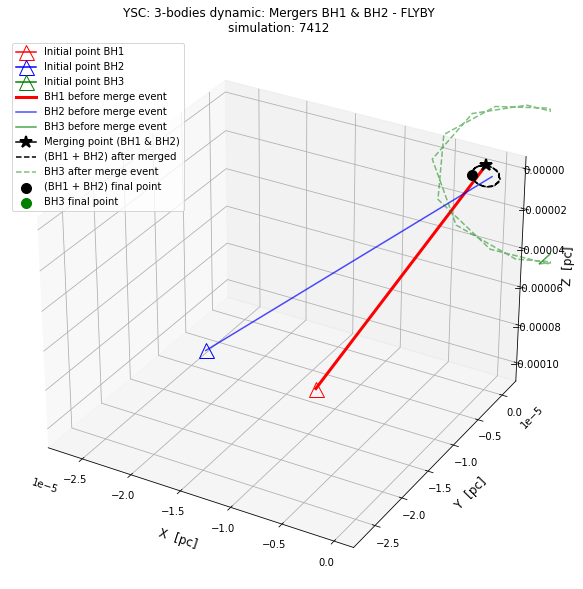

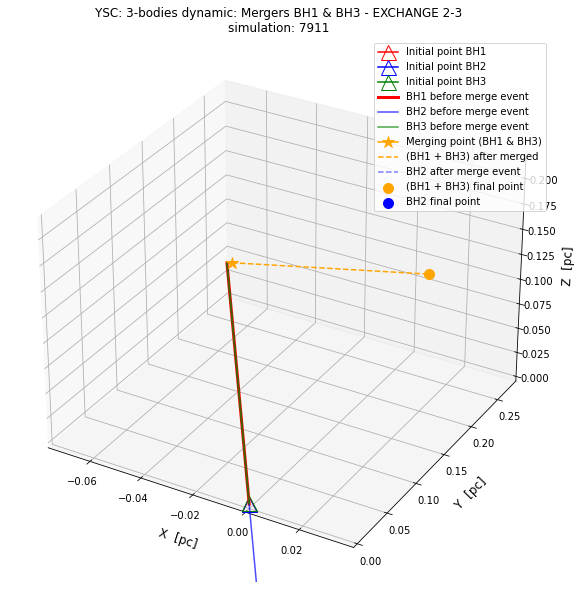

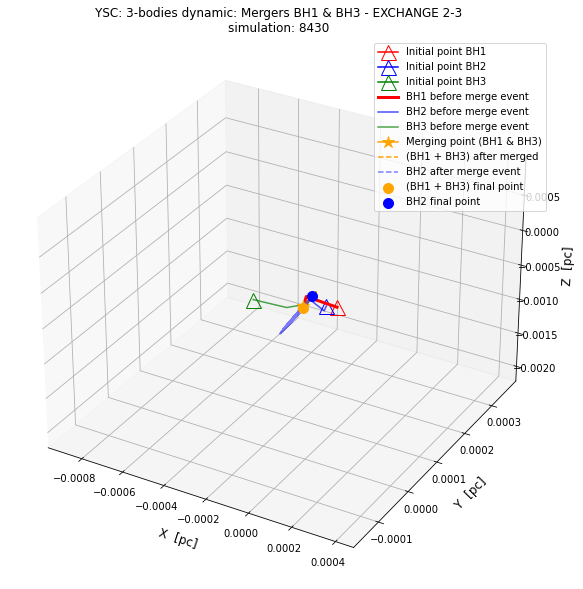

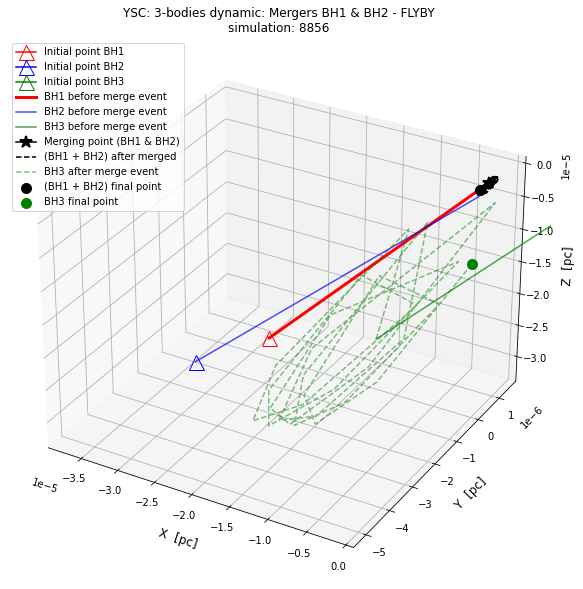

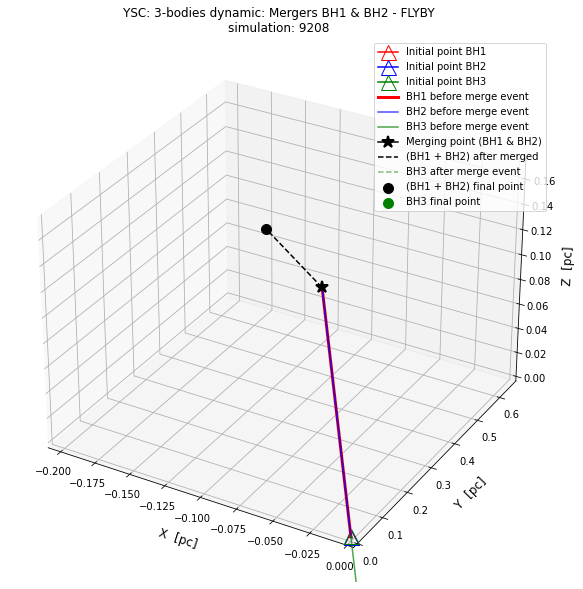

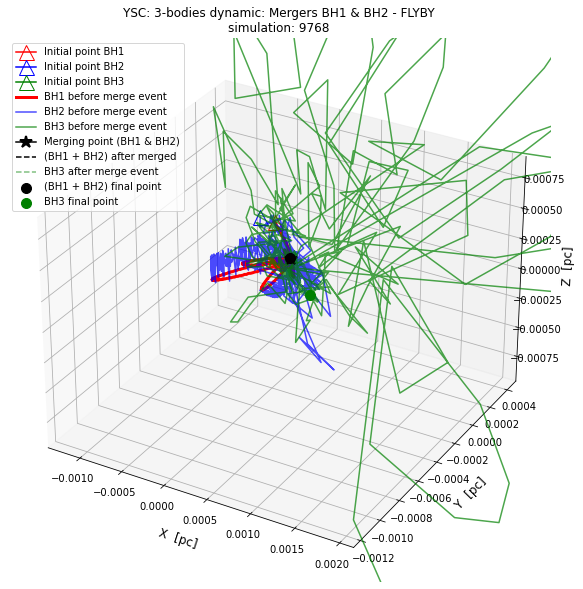

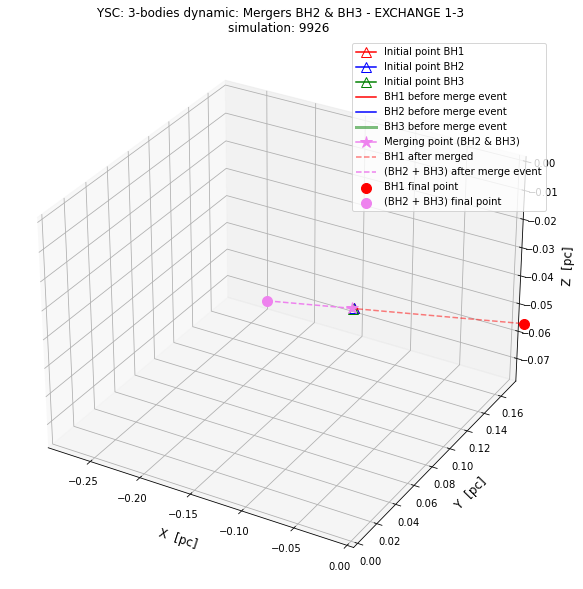

In [42]:
#Plots for YSC
for i in range(len(merge_Y_sim_num)): 
    
    title= "simulation: " + str(merge_Y_sim_num[i])
    
    plot_simulation("YSC", num_sim=merge_Y_sim_num[i],title=title, plot_binary=False, point_after_merging=30)